<a href="https://colab.research.google.com/github/nicoletology/Python_101/blob/main/TP061817_Lab_3_Task_2_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Online Shopper Data Preparation

Session: Lab3\
Date: 5 October 2021

Aim: To learn regularisation

Objectives:
1.   Early Stopping
2.   Dropout
3.   L1
4.   L2
5.   Batch normalisation


[Data Set](https://www.kaggle.com/henrysue/online-shoppers-intention):\
This is a preprocessed dataset. Some of the variables are dropped. All variables are converted to numeric. Revenue is the target variable. It is a factorial variable converted to numeric. This is a classification problem.


## 1. Data Preparation


In [ ]:
#Import the Dependencies
import pandas as pd #data wrangling
import numpy as np #for scientific computing
from sklearn.model_selection import train_test_split
import seaborn as sns #for visualisation
import matplotlib.pyplot as plt #for visualisation

import tensorflow as tf # for deep learning
import keras #high level API for Deep Learning

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

keras.backend.clear_session()
from numpy.random import seed
seed(323)
tf.random.set_seed(323)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
#Configuring the Dataset view
pd.set_option('display.max_rows', 1) 
pd.set_option('display.max_columns', 100) 
pd.set_option('display.width', 1000)

In [ ]:
seed(323)
train_full = pd.read_csv('https://raw.githubusercontent.com/nicoletology/Dataset-for-DL-lab/main/online_shop_train.csv?token=ASQOLHRAYPJMR6XDE657W33BMWSMY')
test = pd.read_csv('https://raw.githubusercontent.com/nicoletology/Dataset-for-DL-lab/main/online_shop_test.csv?token=ASQOLHUD54SP7MZ4MFB5LDLBMWLJI')


In [ ]:
# Changing the data types of VisitorType0 & VisitorType1 
train_full.VisitorType0 = train_full.VisitorType0.astype(int)
train_full.VisitorType1 = train_full.VisitorType0.astype(int)

In [ ]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Administrative  16626 non-null  int64  
 1   Informational   16626 non-null  int64  
 2   ProductRelated  16626 non-null  int64  
 3   ExitRates       16626 non-null  float64
 4   PageValues      16626 non-null  float64
 5   SpecialDay      16626 non-null  float64
 6   Month           16626 non-null  int64  
 7   Region          16626 non-null  int64  
 8   TrafficType     16626 non-null  int64  
 9   VisitorType0    16626 non-null  int64  
 10  VisitorType1    16626 non-null  int64  
 11  Weekend         16626 non-null  int64  
 12  Revenue         16626 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.6 MB


## 2. Model Building
### i. Data Preparation 


**Train-Test Split - Stratified Sampling**
using [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) functions

Parameters: arrays, test_size, train_size, random_state, shuffle, stratify\
*By default, the sampling is stratified as long as the random state is specified.*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train-test split
train_stratified, val_stratified = train_test_split(train_full, test_size = 0.20, random_state = 0)

**Define Variables - X, y**

We have 3 datasets:
1. train_stratified
2. val_stratified
3. test

Thus, we need to assign 6 Objects (3 datasets into X and y).

In [ ]:
#Define the input and target variables for train_stratified Dataset
X_train = train_stratified.iloc[:,:-1] #numpy function for subsetting the variables
y_train = train_stratified.iloc[:,-1]

In [ ]:
#Define the input and target variables for Training Dataset
X_val = val_stratified.iloc[:,:-1] #numpy function for subsetting the variables
y_val = val_stratified.iloc[:,-1]

In [ ]:
#Define the input and target variables for Testing Dataset
X_test = test.iloc[:,:-1] #select all columns from 0 except the last colomn
y_test = test.iloc[:,-1] #select only the last colomn

In [ ]:
#Define the input and target variables for Training Dataset
X_train_full = train_full.iloc[:,:-1] #numpy function for subsetting the variables
y_train_full = train_full.iloc[:,-1]

In [ ]:
X_test.head()

,Administrative,Informational,ProductRelated,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType0,VisitorType1,Weekend
0,0,0,15,0.014286,14.554286,0.0,5,3,2,0.0,1.0,0


In [ ]:
y_test.head()

0    1
    ..
Name: Revenue, Length: 5, dtype: int64

In [ ]:
y_train_full.shape

(16626,)

### ii. Data Processing - Data Type of Target Variable

In [ ]:
# Sample Code for Onehot Encoding
y_train_full_encode = tf.keras.utils.to_categorical(y_train_full, num_classes=None, dtype="int")

In [ ]:
# Onehot Encoding
y_train_encode = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype="int")
y_val_encode = tf.keras.utils.to_categorical(y_val, num_classes=None, dtype="int")
y_test_encode =  tf.keras.utils.to_categorical(y_test, num_classes=None, dtype="int")

## 3. Experiments

## Experiment 5: Regularisations

1.   Early Stopping
2.   Dropout
3.   L1
4.   L2
5.   Batch normalisation

*1. Defining the functions for performance evaluation*

In [ ]:
def model_performance(y_pred, y_pred_prob, y_actual):

  # Confusion Matrix Plot
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
  cm_array = confusion_matrix(y_actual, y_pred, labels=[0,1])
  cm = ConfusionMatrixDisplay(confusion_matrix=cm_array,display_labels=[0,1])
  cm.plot()

  # Confusion Matrix
  from sklearn.metrics import confusion_matrix
  print('Confusion matrix:\n', confusion_matrix(y_actual, y_pred))

  # Classification report
  from sklearn.metrics import classification_report
  print('\nClassification report:\n', classification_report(y_actual, y_pred, labels=[0,1]))

  # ROC AUC
  from sklearn.metrics import roc_auc_score
  auc = roc_auc_score(y_actual, y_pred_prob[:, 1])
  print('\nROC AUC:\n', auc)

  # Accuracy
  from sklearn.metrics import accuracy_score
  print('\nAccuracy:\n', accuracy_score(y_actual, y_pred))
  # Recall
  from sklearn.metrics import recall_score
  print('\nRecall:\n', recall_score(y_actual, y_pred))
  # Precision
  from sklearn.metrics import precision_score
  print('\nPrecision:\n', precision_score(y_actual, y_pred))
  # F1-score
  from sklearn.metrics import f1_score
  print('\nF1-score:\n', f1_score(y_actual, y_pred))


def roc_auc(y_pred_1, y_pred_prob_1, y_train, y_pred_2, y_pred_prob_2, y_test):
  # calculate scores
  null_probs = [0 for _ in range(len(y_train))]
  null_auc = roc_auc_score(y_train, null_probs)
  auc_1 = roc_auc_score(y_train, y_pred_prob_1[:, 1])
  auc_2 = roc_auc_score(y_test, y_pred_prob_2[:, 1])

  # summarize scores
  print('Null: ROC AUC=%.3f' % (null_auc))
  print('Training: ROC AUC=%.3f' % (auc_1))
  print('Test: ROC AUC=%.3f' % (auc_2))

  # calculate roc curves
  null_fpr, null_tpr, _ = roc_curve(y_train, null_probs)
  fpr_1, tpr_1, _ = roc_curve(y_train, y_pred_prob_1[:, 1])
  fpr_2, tpr_2, _ = roc_curve(y_test, y_pred_prob_2[:, 1])

  # plot the roc curve for the model
  pyplot.plot(null_fpr, null_tpr, linestyle='--')
  pyplot.plot(fpr_1, tpr_1, marker='.', label='Training')
  pyplot.plot(fpr_2, tpr_2, marker='.', label='Test')
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()


*2. Recreate the baseline*

In [ ]:
## Recreate the chunk of codes for baseline Sequential NN for easy ref. 

keras.backend.clear_session()

def create_baseline():
    #Initializing Neural Network
    classifier = Sequential()

    ## STEP 1: Defining the architecture of ANN
    # First layer 
    # dim = 12 because we have 12 variables (only applicable to first layer)
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12)) 
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    # Third layer
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    return classifier



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None
Network Performance:
Best Training Accuracy - 87.68  %
Best Training Loss - 29.07  %
Best Validation Accuracy - 86.47  %
Best Validation Loss - 30.93  %
Evaluate on test data
78/78 [==============================] - 0s 1ms/step - loss: 0.3214 - 

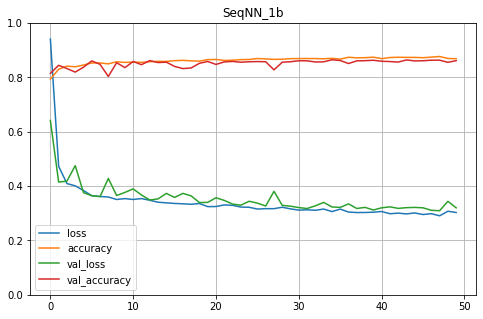

In [ ]:
#Recreate the baseline Sequential NN

keras.backend.clear_session()
model1b = create_baseline()
print(model1b.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model1b.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#use manual train-validation split (stratified)
SeqNN_1b = model1b.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0)

#display the best training network performance
acc_train = SeqNN_1b.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_1b.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_1b.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_1b.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = model1b.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

#Plotting the evaluation graph
pd.DataFrame(SeqNN_1b.history).plot(figsize=(8, 5))
plt.title("SeqNN_1b")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

#Make Predictions for Training Dataset
SeqNN1b_y_train_predProb = model1b.predict(X_train)
SeqNN1b_y_train_predClass = (SeqNN1b_y_train_predProb>0.5)
SeqNN1b_y_train_pred = np.argmax(SeqNN1b_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN1b_y_test_predProb = model1b.predict(X_test)
SeqNN1b_y_test_predClass = (SeqNN1b_y_test_predProb>0.5)
SeqNN1b_y_test_pred = np.argmax(SeqNN1b_y_test_predClass, axis=1)



Model:  SeqNN1b_train 

Confusion matrix:
 [[5651 1000]
 [ 595 6054]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      6651
           1       0.86      0.91      0.88      6649

    accuracy                           0.88     13300
   macro avg       0.88      0.88      0.88     13300
weighted avg       0.88      0.88      0.88     13300


ROC AUC:
 0.9470381241910367

Accuracy:
 0.8800751879699248

Recall:
 0.9105128590765529

Precision:
 0.8582364615820811

F1-score:
 0.8836021309202364
Model:  SeqNN1b_test 

Confusion matrix:
 [[1818  291]
 [  61  296]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      2109
           1       0.50      0.83      0.63       357

    accuracy                           0.86      2466
   macro avg       0.74      0.85      0.77      2466
weighted avg       0.90      0.86      0.87      2466


ROC

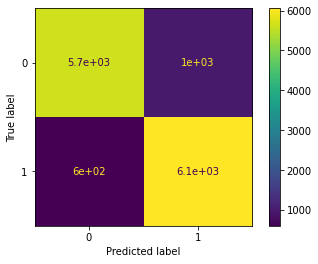

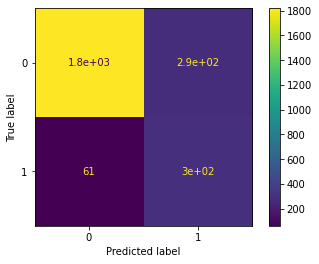

In [ ]:
print("Model: ", "SeqNN1b_train","\n")
model_performance(SeqNN1b_y_train_pred,SeqNN1b_y_train_predProb, y_train)
print("Model: ", "SeqNN1b_test","\n")
model_performance(SeqNN1b_y_test_pred,SeqNN1b_y_test_predProb, y_test)


Model:  SeqNN1b
Null: ROC AUC=0.500
Training: ROC AUC=0.947
Test: ROC AUC=0.905


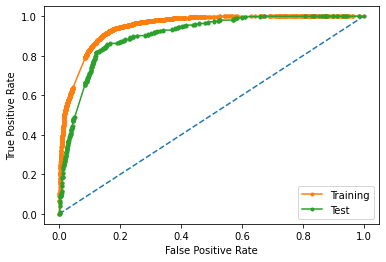

In [ ]:
print("Model: ", "SeqNN1b")
roc_auc(SeqNN1b_y_train_pred, SeqNN1b_y_train_predProb, y_train, SeqNN1b_y_test_pred, SeqNN1b_y_test_predProb, y_test)

***Experiment on Regularization : Early Stopping***

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None
Network Performance:
Best Training Accuracy - 85.46  %
Best Training Loss - 35.13  %
Best Validation Accuracy - 85.96  %
Best Validation Loss - 34.49  %
Evaluate on test data
78/78 [==============================] - 0s 2ms/step - loss: 0.3959 - 

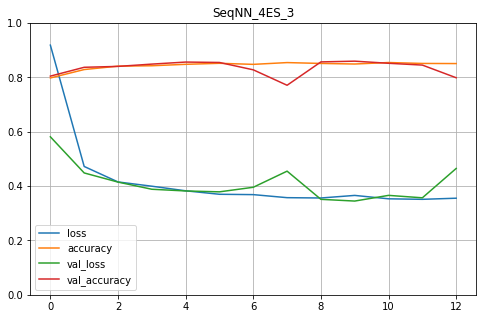

In [ ]:
#EARLY STOPPING - 3

from keras.callbacks import EarlyStopping
ES_monitor_1 = EarlyStopping(patience=3)

keras.backend.clear_session()
Model_4ES_3 = create_baseline()
print(Model_4ES_3.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model_4ES_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#use manual train-validation split (stratified)
SeqNN_4ES_3 = Model_4ES_3.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0, callbacks=[ES_monitor_1])

#display the best training network performance
acc_train = SeqNN_4ES_3.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_4ES_3.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_4ES_3.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_4ES_3.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = Model_4ES_3.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

#Plotting the evaluation graph
pd.DataFrame(SeqNN_4ES_3.history).plot(figsize=(8, 5))
plt.title("SeqNN_4ES_3")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

#Make Predictions for Training Dataset
SeqNN_4ES_3_y_train_predProb = Model_4ES_3.predict(X_train)
SeqNN_4ES_3_y_train_predClass = (SeqNN_4ES_3_y_train_predProb>0.5)
SeqNN_4ES_3_y_train_pred = np.argmax(SeqNN_4ES_3_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN_4ES_3_y_test_predProb = Model_4ES_3.predict(X_test)
SeqNN_4ES_3_y_test_predClass = (SeqNN_4ES_3_y_test_predProb>0.5)
SeqNN_4ES_3_y_test_pred = np.argmax(SeqNN_4ES_3_y_test_predClass, axis=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None
Network Performance:
Best Training Accuracy - 87.11  %
Best Training Loss - 31.48  %
Best Validation Accuracy - 86.35  %
Best Validation Loss - 32.39  %
Evaluate on test data
78/78 [==============================] - 0s 1ms/step - loss: 0.3397 - 

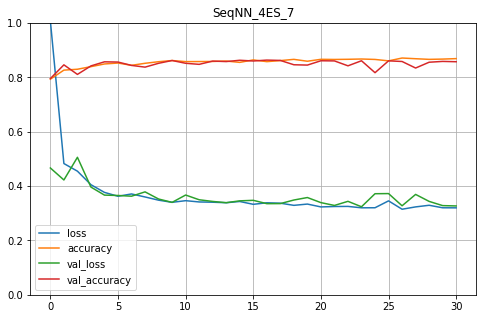

In [ ]:
#EARLY STOPPING - 7

from keras.callbacks import EarlyStopping
ES_monitor_1 = EarlyStopping(patience=7)

keras.backend.clear_session()
Model_4ES_7 = create_baseline()
print(Model_4ES_7.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model_4ES_7.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#use manual train-validation split (stratified)
SeqNN_4ES_7 = Model_4ES_7.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0, callbacks=[ES_monitor_1])

#display the best training network performance
acc_train = SeqNN_4ES_7.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_4ES_7.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_4ES_7.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_4ES_7.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = Model_4ES_7.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

#Plotting the evaluation graph
pd.DataFrame(SeqNN_4ES_7.history).plot(figsize=(8, 5))
plt.title("SeqNN_4ES_7")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

#Make Predictions for Training Dataset
SeqNN_4ES_7_y_train_predProb = Model_4ES_7.predict(X_train)
SeqNN_4ES_7_y_train_predClass = (SeqNN_4ES_7_y_train_predProb>0.5)
SeqNN_4ES_7_y_train_pred = np.argmax(SeqNN_4ES_7_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN_4ES_7_y_test_predProb = Model_4ES_7.predict(X_test)
SeqNN_4ES_7_y_test_predClass = (SeqNN_4ES_7_y_test_predProb>0.5)
SeqNN_4ES_7_y_test_pred = np.argmax(SeqNN_4ES_7_y_test_predClass, axis=1)

Model:  SeqNN_4ES_3_train 

Confusion matrix:
 [[4894 1757]
 [ 680 5969]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      6651
           1       0.77      0.90      0.83      6649

    accuracy                           0.82     13300
   macro avg       0.83      0.82      0.82     13300
weighted avg       0.83      0.82      0.82     13300


ROC AUC:
 0.9062726305901437

Accuracy:
 0.816766917293233

Recall:
 0.8977289818017747

Precision:
 0.7725860730002588

F1-score:
 0.8304695652173913
Model:  SeqNN_4ES_3_test 

Confusion matrix:
 [[1601  508]
 [  52  305]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.76      0.85      2109
           1       0.38      0.85      0.52       357

    accuracy                           0.77      2466
   macro avg       0.67      0.81      0.69      2466
weighted avg       0.88      0.77      0.80      246

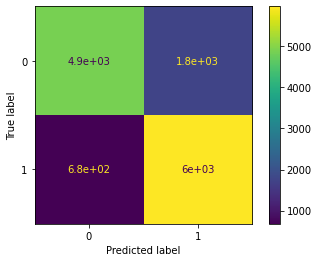

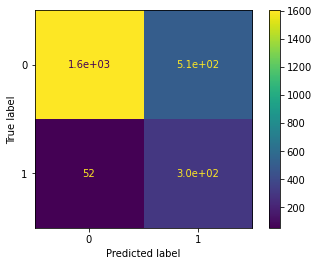

In [ ]:
# Confusion Metric
# EARLY STOPPING -3
print("Model: ", "SeqNN_4ES_3_train","\n")
model_performance(SeqNN_4ES_3_y_train_pred,SeqNN_4ES_3_y_train_predProb, y_train)
print("Model: ", "SeqNN_4ES_3_test","\n")
model_performance(SeqNN_4ES_3_y_test_pred,SeqNN_4ES_3_y_test_predProb, y_test)


Model:  SeqNN_4ES_7_train 

Confusion matrix:
 [[5622 1029]
 [ 654 5995]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      6651
           1       0.85      0.90      0.88      6649

    accuracy                           0.87     13300
   macro avg       0.87      0.87      0.87     13300
weighted avg       0.87      0.87      0.87     13300


ROC AUC:
 0.9417621333430297

Accuracy:
 0.8734586466165414

Recall:
 0.9016393442622951

Precision:
 0.853502277904328

F1-score:
 0.8769106999195494
Model:  SeqNN_4ES_7_test 

Confusion matrix:
 [[1800  309]
 [  59  298]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      2109
           1       0.49      0.83      0.62       357

    accuracy                           0.85      2466
   macro avg       0.73      0.84      0.76      2466
weighted avg       0.90      0.85      0.87      246

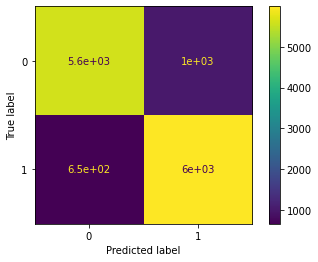

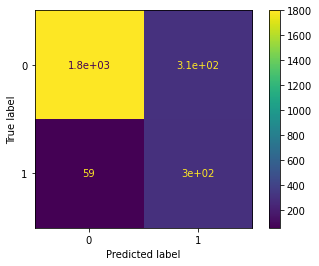

In [ ]:
# EARLY STOPPING -7
print("Model: ", "SeqNN_4ES_7_train","\n")
model_performance(SeqNN_4ES_7_y_train_pred,SeqNN_4ES_7_y_train_predProb, y_train)
print("Model: ", "SeqNN_4ES_7_test","\n")
model_performance(SeqNN_4ES_7_y_test_pred,SeqNN_4ES_7_y_test_predProb, y_test)

Model:  SeqNN_4ES_3
Null: ROC AUC=0.500
Training: ROC AUC=0.906
Test: ROC AUC=0.885


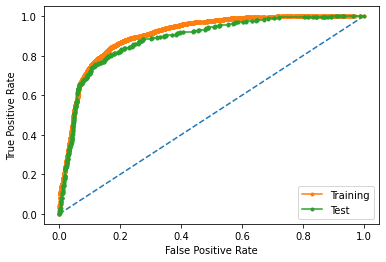

Model:  SeqNN_4ES_7
Null: ROC AUC=0.500
Training: ROC AUC=0.942
Test: ROC AUC=0.908


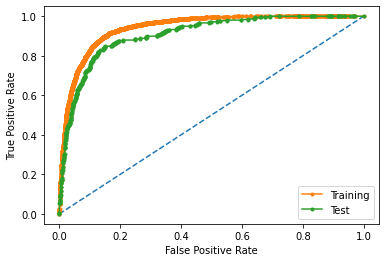

In [ ]:
# ROC
# EARLY STOPPING -3
print("Model: ", "SeqNN_4ES_3")
roc_auc(SeqNN_4ES_3_y_train_pred, SeqNN_4ES_3_y_train_predProb, y_train, SeqNN_4ES_3_y_test_pred, SeqNN_4ES_3_y_test_predProb, y_test)
# EARLY STOPPING -7
print("Model: ", "SeqNN_4ES_7")
roc_auc(SeqNN_4ES_7_y_train_pred, SeqNN_4ES_7_y_train_predProb, y_train, SeqNN_4ES_7_y_test_pred, SeqNN_4ES_7_y_test_predProb, y_test)

***Experiment on Regularization : Dropout***

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None
Network Performance:
Best Training Accuracy - 86.93  %
Best Training Loss - 31.35  %
Best Validation Accuracy - 8

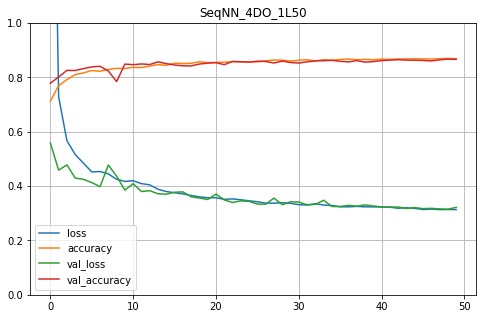

In [ ]:
# # DROPOUT - 1LAYER - 50%

def create_dropout_1():
    #Initializing Neural Network
    classifier = Sequential()

    ## STEP 1: Defining the architecture of ANN
    # First layer 
    # dim = 12 because we have 12 variables (only applicable to first layer)
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12)) 
    classifier.add(keras.layers.Dropout(rate=0.5))
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    #classifier.add(keras.layers.Dropout(rate=0.5))
    # Third layer
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    #classifier.add(keras.layers.Dropout(rate=0.5))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    
    return classifier

keras.backend.clear_session()
Model_4DO_1L50 = create_dropout_1()
print(Model_4DO_1L50.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model_4DO_1L50.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#use manual train-validation split (stratified)
SeqNN_4DO_1L50 = Model_4DO_1L50.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0)

#display the best training network performance
acc_train = SeqNN_4DO_1L50.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_4DO_1L50.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_4DO_1L50.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_4DO_1L50.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = Model_4DO_1L50.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

#Plotting the evaluation graph
pd.DataFrame(SeqNN_4DO_1L50.history).plot(figsize=(8, 5))
plt.title("SeqNN_4DO_1L50")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

#Make Predictions for Training Dataset
SeqNN_4DO_1L50_y_train_predProb = Model_4DO_1L50.predict(X_train)
SeqNN_4DO_1L50_y_train_predClass = (SeqNN_4DO_1L50_y_train_predProb>0.5)
SeqNN_4DO_1L50_y_train_pred = np.argmax(SeqNN_4DO_1L50_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN_4DO_1L50_y_test_predProb = Model_4DO_1L50.predict(X_test)
SeqNN_4DO_1L50_y_test_predClass = (SeqNN_4DO_1L50_y_test_predProb>0.5)
SeqNN_4DO_1L50_y_test_pred = np.argmax(SeqNN_4DO_1L50_y_test_predClass, axis=1)

Model:  SeqNN_4DO_1L50_train 

Confusion matrix:
 [[5803  848]
 [ 789 5860]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      6651
           1       0.87      0.88      0.88      6649

    accuracy                           0.88     13300
   macro avg       0.88      0.88      0.88     13300
weighted avg       0.88      0.88      0.88     13300


ROC AUC:
 0.9440296103573885

Accuracy:
 0.8769172932330828

Recall:
 0.8813355391788239

Precision:
 0.8735837805605248

F1-score:
 0.877442539492401
Model:  SeqNN_4DO_1L50_test 

Confusion matrix:
 [[1850  259]
 [  69  288]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      2109
           1       0.53      0.81      0.64       357

    accuracy                           0.87      2466
   macro avg       0.75      0.84      0.78      2466
weighted avg       0.90      0.87      0.88   

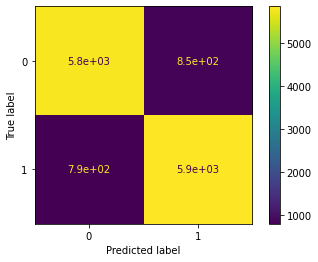

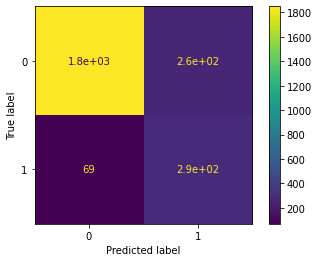

In [ ]:
# Confusion Metric
# # DROPOUT - 1LAYER - 50%
print("Model: ", "SeqNN_4DO_1L50_train","\n")
model_performance(SeqNN_4DO_1L50_y_train_pred,SeqNN_4DO_1L50_y_train_predProb, y_train)
print("Model: ", "SeqNN_4DO_1L50_test","\n")
model_performance(SeqNN_4DO_1L50_y_test_pred,SeqNN_4DO_1L50_y_test_predProb, y_test)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
____________________________________________________

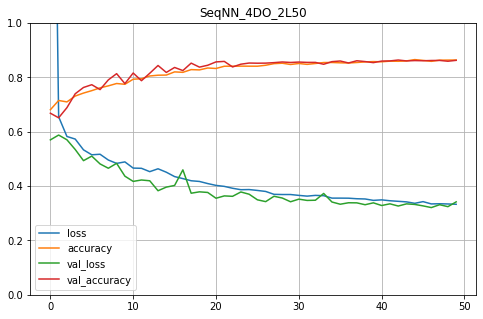

In [ ]:
# # DROPOUT - 2LAYER - 50%

def create_dropout_2():
    #Initializing Neural Network
    classifier = Sequential()

    ## STEP 1: Defining the architecture of ANN
    # First layer 
    # dim = 12 because we have 12 variables (only applicable to first layer)
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12)) 
    classifier.add(keras.layers.Dropout(rate=0.5))
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    classifier.add(keras.layers.Dropout(rate=0.5))
    # Third layer
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    #classifier.add(keras.layers.Dropout(rate=0.5))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    
    return classifier

keras.backend.clear_session()
Model_4DO_2L50 = create_dropout_2()
print(Model_4DO_2L50.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model_4DO_2L50.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#use manual train-validation split (stratified)
SeqNN_4DO_2L50 = Model_4DO_2L50.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0)

#display the best training network performance
acc_train = SeqNN_4DO_2L50.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_4DO_2L50.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_4DO_2L50.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_4DO_2L50.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = Model_4DO_2L50.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

#Plotting the evaluation graph
pd.DataFrame(SeqNN_4DO_2L50.history).plot(figsize=(8, 5))
plt.title("SeqNN_4DO_2L50")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

#Make Predictions for Training Dataset
SeqNN_4DO_2L50_y_train_predProb = Model_4DO_2L50.predict(X_train)
SeqNN_4DO_2L50_y_train_predClass = (SeqNN_4DO_2L50_y_train_predProb>0.5)
SeqNN_4DO_2L50_y_train_pred = np.argmax(SeqNN_4DO_2L50_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN_4DO_2L50_y_test_predProb = Model_4DO_2L50.predict(X_test)
SeqNN_4DO_2L50_y_test_predClass = (SeqNN_4DO_2L50_y_test_predProb>0.5)
SeqNN_4DO_2L50_y_test_pred = np.argmax(SeqNN_4DO_2L50_y_test_predClass, axis=1)

Model:  SeqNN_4DO_2L50_train 

Confusion matrix:
 [[5740  911]
 [ 817 5832]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      6651
           1       0.86      0.88      0.87      6649

    accuracy                           0.87     13300
   macro avg       0.87      0.87      0.87     13300
weighted avg       0.87      0.87      0.87     13300


ROC AUC:
 0.936662455461868

Accuracy:
 0.8700751879699248

Recall:
 0.8771243796059558

Precision:
 0.864896930149785

F1-score:
 0.8709677419354839
Model:  SeqNN_4DO_2L50_test 

Confusion matrix:
 [[1834  275]
 [  61  296]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      2109
           1       0.52      0.83      0.64       357

    accuracy                           0.86      2466
   macro avg       0.74      0.85      0.78      2466
weighted avg       0.90      0.86      0.88    

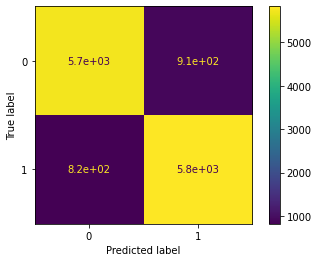

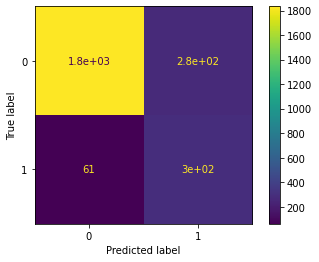

In [ ]:
# Confusion Metric
# DROPOUT - 2LAYER - 50%
print("Model: ", "SeqNN_4DO_2L50_train","\n")
model_performance(SeqNN_4DO_2L50_y_train_pred,SeqNN_4DO_2L50_y_train_predProb, y_train)
print("Model: ", "SeqNN_4DO_2L50_test","\n")
model_performance(SeqNN_4DO_2L50_y_test_pred,SeqNN_4DO_2L50_y_test_predProb, y_test)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dropout_2 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

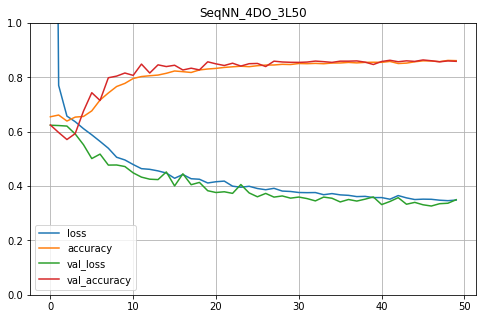

In [ ]:
# # DROPOUT - 3LAYER - 50%

def create_dropout_3():
    #Initializing Neural Network
    classifier = Sequential()

    ## STEP 1: Defining the architecture of ANN
    # First layer 
    # dim = 12 because we have 12 variables (only applicable to first layer)
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12)) 
    classifier.add(keras.layers.Dropout(rate=0.5))
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    classifier.add(keras.layers.Dropout(rate=0.5))
    # Third layer
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    classifier.add(keras.layers.Dropout(rate=0.5))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    
    return classifier

keras.backend.clear_session()
Model_4DO_3L50 = create_dropout_3()
print(Model_4DO_3L50.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model_4DO_3L50.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#use manual train-validation split (stratified)
SeqNN_4DO_3L50 = Model_4DO_3L50.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0)

#display the best training network performance
acc_train = SeqNN_4DO_3L50.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_4DO_3L50.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_4DO_3L50.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_4DO_3L50.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = Model_4DO_3L50.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

#Plotting the evaluation graph
pd.DataFrame(SeqNN_4DO_3L50.history).plot(figsize=(8, 5))
plt.title("SeqNN_4DO_3L50")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

#Make Predictions for Training Dataset
SeqNN_4DO_3L50_y_train_predProb = Model_4DO_3L50.predict(X_train)
SeqNN_4DO_3L50_y_train_predClass = (SeqNN_4DO_3L50_y_train_predProb>0.5)
SeqNN_4DO_3L50_y_train_pred = np.argmax(SeqNN_4DO_3L50_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN_4DO_3L50_y_test_predProb = Model_4DO_3L50.predict(X_test)
SeqNN_4DO_3L50_y_test_predClass = (SeqNN_4DO_3L50_y_test_predProb>0.5)
SeqNN_4DO_3L50_y_test_pred = np.argmax(SeqNN_4DO_3L50_y_test_predClass, axis=1)

Model:  SeqNN_4DO_3L50_train 

Confusion matrix:
 [[5683  968]
 [ 769 5880]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      6651
           1       0.86      0.88      0.87      6649

    accuracy                           0.87     13300
   macro avg       0.87      0.87      0.87     13300
weighted avg       0.87      0.87      0.87     13300


ROC AUC:
 0.9394556716480451

Accuracy:
 0.8693984962406015

Recall:
 0.8843435103023011

Precision:
 0.8586448598130841

F1-score:
 0.871304734385419
Model:  SeqNN_4DO_3L50_test 

Confusion matrix:
 [[1814  295]
 [  58  299]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      2109
           1       0.50      0.84      0.63       357

    accuracy                           0.86      2466
   macro avg       0.74      0.85      0.77      2466
weighted avg       0.90      0.86      0.87   

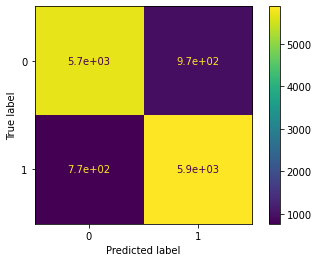

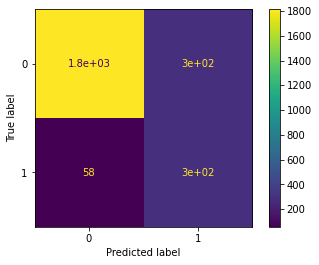

In [ ]:
# Confusion Metric
# # DROPOUT - 3LAYER - 50%
print("Model: ", "SeqNN_4DO_3L50_train","\n")
model_performance(SeqNN_4DO_3L50_y_train_pred,SeqNN_4DO_3L50_y_train_predProb, y_train)
print("Model: ", "SeqNN_4DO_3L50_test","\n")
model_performance(SeqNN_4DO_3L50_y_test_pred,SeqNN_4DO_3L50_y_test_predProb, y_test)


Model:  SeqNN_4DO_1L50
Null: ROC AUC=0.500
Training: ROC AUC=0.944
Test: ROC AUC=0.910


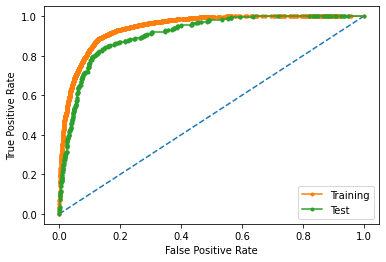

Model:  SeqNN_4DO_2L50
Null: ROC AUC=0.500
Training: ROC AUC=0.937
Test: ROC AUC=0.910


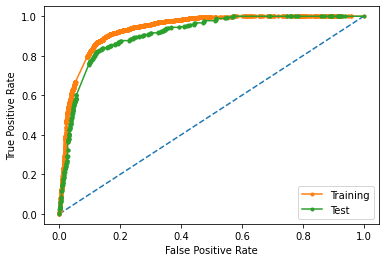

Model:  SeqNN_4DO_3L50
Null: ROC AUC=0.500
Training: ROC AUC=0.939
Test: ROC AUC=0.913


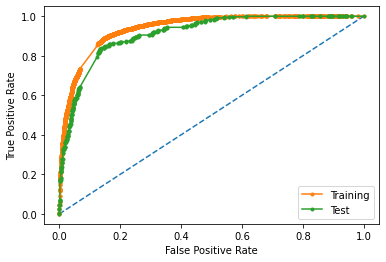

In [ ]:
# ROC
# DROPOUT 
print("Model: ", "SeqNN_4DO_1L50")
roc_auc(SeqNN_4DO_1L50_y_train_pred, SeqNN_4DO_1L50_y_train_predProb, y_train, SeqNN_4DO_1L50_y_test_pred, SeqNN_4DO_1L50_y_test_predProb, y_test)
print("Model: ", "SeqNN_4DO_2L50")
roc_auc(SeqNN_4DO_2L50_y_train_pred, SeqNN_4DO_2L50_y_train_predProb, y_train, SeqNN_4DO_2L50_y_test_pred, SeqNN_4DO_2L50_y_test_predProb, y_test)
print("Model: ", "SeqNN_4DO_3L50")
roc_auc(SeqNN_4DO_3L50_y_train_pred, SeqNN_4DO_3L50_y_train_predProb, y_train, SeqNN_4DO_3L50_y_test_pred, SeqNN_4DO_3L50_y_test_predProb, y_test)


***Experiment on Regularization : MODEL PARAMETER WEIGTAGE***\
 ***LASSO VS RIDGE***

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None
Network Performance:
Best Training Accuracy - 86.96  %
Best Training Loss - 34.29  %
Best Validation Accuracy - 86.23  %
Best Validation Loss - 35.09  %
Evaluate on test data
78/78 [==============================] - 0s 1ms/step - loss: 0.3838 - 

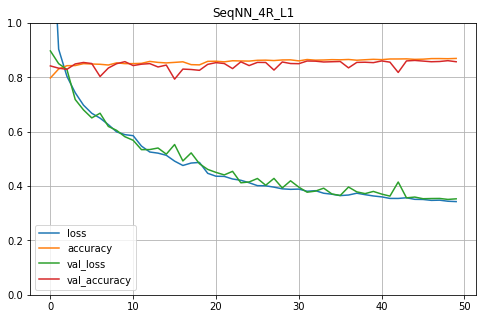

In [ ]:
# # Regularise model parameter weightage - LASSO

from tensorflow.keras import layers
from tensorflow.keras import regularizers

def create_lasso():
    #Initializing Neural Network
    classifier = Sequential()

    ## STEP 1: Defining the architecture of ANN
    # First layer 
    # dim = 12 because we have 12 variables (only applicable to first layer)
    classifier.add(Dense(units = 512, kernel_regularizer = keras.regularizers.l1(1e-4), kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12)) 
    # Second layer
    classifier.add(Dense(units= 128, kernel_regularizer = keras.regularizers.l1(1e-4), kernel_initializer = 'he_uniform', activation = 'relu'))
    # Third layer
    classifier.add(Dense(units= 96, kernel_regularizer = keras.regularizers.l1(1e-4), kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_regularizer = keras.regularizers.l1(1e-4), kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    
    return classifier

keras.backend.clear_session()
Model_4R_L1 = create_lasso()
print(Model_4R_L1.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model_4R_L1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#use manual train-validation split (stratified)
SeqNN_4R_L1 = Model_4R_L1.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0)

#display the best training network performance
acc_train = SeqNN_4R_L1.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_4R_L1.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_4R_L1.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_4R_L1.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = Model_4R_L1.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

#Plotting the evaluation graph
pd.DataFrame(SeqNN_4R_L1.history).plot(figsize=(8, 5))
plt.title("SeqNN_4R_L1")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

#Make Predictions for Training Dataset
SeqNN_4R_L1_y_train_predProb = Model_4R_L1.predict(X_train)
SeqNN_4R_L1_y_train_predClass = (SeqNN_4R_L1_y_train_predProb>0.5)
SeqNN_4R_L1_y_train_pred = np.argmax(SeqNN_4R_L1_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN_4R_L1_y_test_predProb = Model_4R_L1.predict(X_test)
SeqNN_4R_L1_y_test_predClass = (SeqNN_4R_L1_y_test_predProb>0.5)
SeqNN_4R_L1_y_test_pred = np.argmax(SeqNN_4R_L1_y_test_predClass, axis=1)

Model:  SeqNN_4R_L1_train 

Confusion matrix:
 [[5728  923]
 [ 766 5883]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      6651
           1       0.86      0.88      0.87      6649

    accuracy                           0.87     13300
   macro avg       0.87      0.87      0.87     13300
weighted avg       0.87      0.87      0.87     13300


ROC AUC:
 0.9427031136345325

Accuracy:
 0.8730075187969925

Recall:
 0.8847947059708227

Precision:
 0.8643843667352337

F1-score:
 0.8744704570791527
Model:  SeqNN_4R_L1_test 

Confusion matrix:
 [[1805  304]
 [  59  298]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      2109
           1       0.50      0.83      0.62       357

    accuracy                           0.85      2466
   macro avg       0.73      0.85      0.77      2466
weighted avg       0.90      0.85      0.87      24

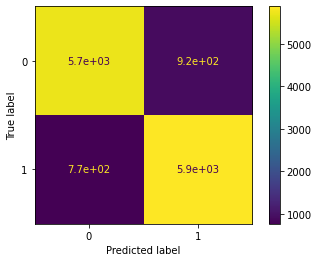

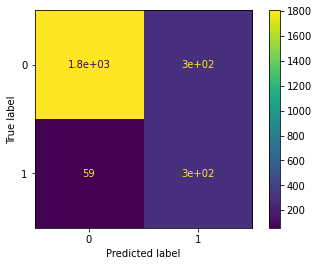

In [ ]:
# Confusion Metric
# # Regularise model parameter weightage - LASSO
print("Model: ", "SeqNN_4R_L1_train","\n")
model_performance(SeqNN_4R_L1_y_train_pred,SeqNN_4R_L1_y_train_predProb, y_train)
print("Model: ", "SeqNN_4R_L1_test","\n")
model_performance(SeqNN_4R_L1_y_test_pred,SeqNN_4R_L1_y_test_predProb, y_test)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None
Network Performance:
Best Training Accuracy - 86.98  %
Best Training Loss - 32.62  %
Best Validation Accuracy - 86.56  %
Best Validation Loss - 33.19  %
Evaluate on test data
78/78 [==============================] - 0s 1ms/step - loss: 0.3493 - 

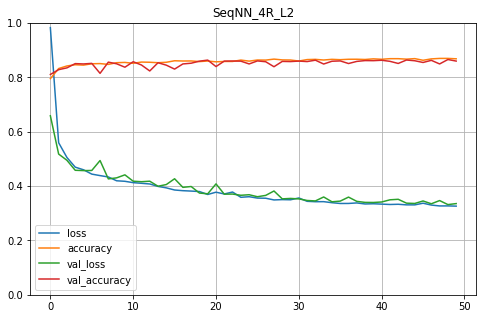

In [ ]:
# # Regularise model parameter weightage - RIDGE

from tensorflow.keras import layers
from tensorflow.keras import regularizers

def create_ridge():
    #Initializing Neural Network
    classifier = Sequential()

    ## STEP 1: Defining the architecture of ANN
    # First layer 
    # dim = 12 because we have 12 variables (only applicable to first layer)
    classifier.add(Dense(units = 512, kernel_regularizer = keras.regularizers.l2(1e-4), kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12)) 
    # Second layer
    classifier.add(Dense(units= 128, kernel_regularizer = keras.regularizers.l2(1e-4), kernel_initializer = 'he_uniform', activation = 'relu'))
    # Third layer
    classifier.add(Dense(units= 96, kernel_regularizer = keras.regularizers.l2(1e-4), kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_regularizer = keras.regularizers.l2(1e-4), kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    
    return classifier

keras.backend.clear_session()
Model_4R_L2 = create_ridge()
print(Model_4R_L2.summary())
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model_4R_L2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#use manual train-validation split (stratified)
SeqNN_4R_L2 = Model_4R_L2.fit(X_train, y_train_encode, validation_data= (X_val, y_val_encode), epochs = 50,  batch_size = 32, verbose = 0)

#display the best training network performance
acc_train = SeqNN_4R_L2.history['accuracy']
max_acc_train = max(acc_train)

loss_train = SeqNN_4R_L2.history['loss']
min_loss_train = min(loss_train)

print("Network Performance:")
print("Best Training Accuracy - %.2f " % (max_acc_train*100),'%')
print("Best Training Loss - %.2f " % (min_loss_train*100),'%')

#display the best validation network performance
acc_val = SeqNN_4R_L2.history['val_accuracy']
max_acc_val = max(acc_val)

loss_val = SeqNN_4R_L2.history['val_loss']
min_loss_val = min(loss_val)

print("Best Validation Accuracy - %.2f " % (max_acc_val*100),'%')
print("Best Validation Loss - %.2f " % (min_loss_val*100),'%')

#Evaluate network on test data
print("Evaluate on test data")
results = Model_4R_L2.evaluate(X_test, y_test_encode, batch_size=32)
print("Test loss, Test accuracy: " , results)

#Plotting the evaluation graph
pd.DataFrame(SeqNN_4R_L2.history).plot(figsize=(8, 5))
plt.title("SeqNN_4R_L2")
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.savefig ('/content/drive/My Drive/Colab Notebooks/output.png')
plt.show()

#Make Predictions for Training Dataset
SeqNN_4R_L2_y_train_predProb = Model_4R_L2.predict(X_train)
SeqNN_4R_L2_y_train_predClass = (SeqNN_4R_L2_y_train_predProb>0.5)
SeqNN_4R_L2_y_train_pred = np.argmax(SeqNN_4R_L2_y_train_predClass, axis=1)

#Make Predictions for Test Dataset
SeqNN_4R_L2_y_test_predProb = Model_4R_L2.predict(X_test)
SeqNN_4R_L2_y_test_predClass = (SeqNN_4R_L2_y_test_predProb>0.5)
SeqNN_4R_L2_y_test_pred = np.argmax(SeqNN_4R_L2_y_test_predClass, axis=1)

Model:  SeqNN_4R_L2_train 

Confusion matrix:
 [[5708  943]
 [ 760 5889]]

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      6651
           1       0.86      0.89      0.87      6649

    accuracy                           0.87     13300
   macro avg       0.87      0.87      0.87     13300
weighted avg       0.87      0.87      0.87     13300


ROC AUC:
 0.942842205728808

Accuracy:
 0.8719548872180451

Recall:
 0.8856970973078658

Precision:
 0.8619730679156908

F1-score:
 0.8736740597878495
Model:  SeqNN_4R_L2_test 

Confusion matrix:
 [[1803  306]
 [  56  301]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      2109
           1       0.50      0.84      0.62       357

    accuracy                           0.85      2466
   macro avg       0.73      0.85      0.77      2466
weighted avg       0.90      0.85      0.87      246

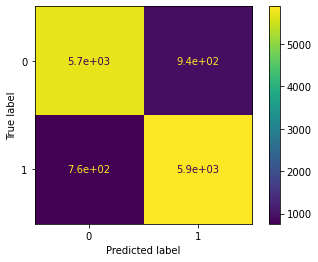

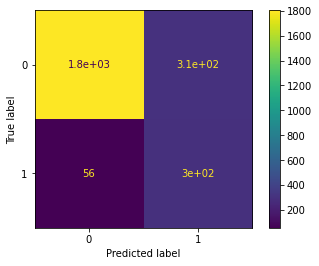

In [ ]:
# Confusion Metric
# # Regularise model parameter weightage - RIDGE
print("Model: ", "SeqNN_4R_L2_train","\n")
model_performance(SeqNN_4R_L2_y_train_pred,SeqNN_4R_L2_y_train_predProb, y_train)
print("Model: ", "SeqNN_4R_L2_test","\n")
model_performance(SeqNN_4R_L2_y_test_pred,SeqNN_4R_L2_y_test_predProb, y_test)


Model:  SeqNN_4R_L1
Null: ROC AUC=0.500
Training: ROC AUC=0.943
Test: ROC AUC=0.912


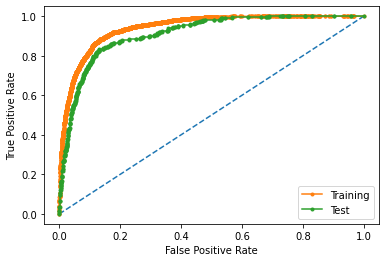

Model:  SeqNN_4R_L2
Null: ROC AUC=0.500
Training: ROC AUC=0.943
Test: ROC AUC=0.912


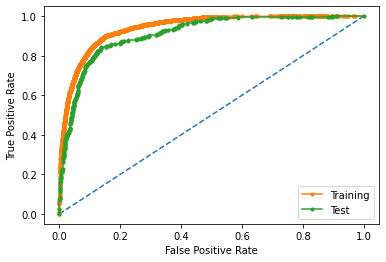

In [ ]:
# ROC
# LASSO RIDGE
print("Model: ", "SeqNN_4R_L1")
roc_auc(SeqNN_4R_L1_y_train_pred, SeqNN_4R_L1_y_train_predProb, y_train, SeqNN_4R_L1_y_test_pred, SeqNN_4R_L1_y_test_predProb, y_test)
print("Model: ", "SeqNN_4R_L2")
roc_auc(SeqNN_4R_L2_y_train_pred, SeqNN_4R_L2_y_train_predProb, y_train, SeqNN_4R_L2_y_test_pred, SeqNN_4R_L2_y_test_predProb, y_test)

